In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta 
from sklearn.cluster import KMeans
import geopandas as gpd
import pycountry
import time
import string
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
from matplotlib.colors import rgb2hex
from generativepy.color import Color
from matplotlib import font_manager
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap
import matplotlib.dates as md
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import ImageColor
import seaborn as sns

/Users/haileyrobertson/.pyenv/versions/3.9.0/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/haileyrobertson/.pyenv/versions/3.9.0/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


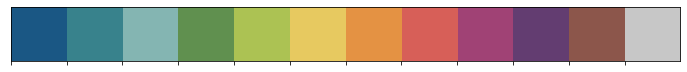

In [2]:
colors = ['#1A5784', '#38828C', '#84B5B2', '#60904F', '#ACC253', '#E7C960', '#E49243', '#D75F58', '#A04275', '#633D71', '#8c564b', '#c7c7c7']
sns.palplot(sns.color_palette(colors))



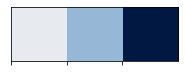

In [3]:
# Define gradient color
# gradient = ['#84B5B2', '#1A5784']
gradient = ['#E7EAEE','#96B7D6', '#001842']
cm = LinearSegmentedColormap.from_list(
        "Custom", gradient, N=100)
sns.palplot(sns.color_palette(gradient))

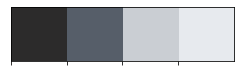

In [4]:
# Define chart color palette
chart = ['#2C2B2B','#565E69','#CACED3','#E7EAEE']
sns.palplot(sns.color_palette(chart))

In [5]:
# Define constants
figure_size = (20,6)

# # Define x-axis range
# left = dt.date(2005, 1, 1)
# right = dt.date(2023, 9, 1)

# Set background
sns.set_context('talk') #change the size from small to medium
sns.set_style('white') #change bg to white

# Add every font at the specified location
font_dir = ['/Users/haileyrobertson/Library/Fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
# Set font family globally
plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.weight'] = 'bold'

# Set margins
plt.rcParams['axes.xmargin'] = 0.9

# Define list of date formats
zfmts = ['', '%Y','%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']

# Format axes 
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.titlepad'] = 30

# Format ticks
plt.rcParams["xtick.direction"] = "out"
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.color'] = chart[2]
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.labelcolor'] = chart[1]
plt.rcParams['xtick.labelsize'] = 14

plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.pad"] = -35
plt.rcParams["ytick.minor.pad"] = -35
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["ytick.minor.size"] = 10
plt.rcParams["ytick.color"] = chart[2]
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.labelcolor"] = chart[1]
plt.rcParams["ytick.labelsize"] = 14


# Adjust fontdict for title
titlefont = {'family': 'Open Sans',
             'color':  chart[0], 
             'weight': 400,
             'size': 20}

# Set grid style
plt.rcParams['grid.color'] = chart[2]
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.linewidth']=0.7

# Set legend style
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125



# Set axis labels
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelcolor'] = chart[1]

- population size of humans with human cases
- population size of humans with hosts and cases
- species habitat (?) with animal cases
- hosts of influenza A

- which areas have similar human and animal demographic profiles and caseloads


In [6]:
# Function to remove the first and last characters from a string
def remove_chars(s):
    return s[1:-1]

In [7]:
path = "data/all_influenza_A_point_date_species_class_subtype.csv"
df = pd.read_csv(path).reset_index()
df.head()

,index,country,lat,long,date,class,host,totalCases,species,subtype
0,0,"""BR""",-28.84267,-49.38699,"""2023-07-12""",NaN,"""Aves""",152,"""Influenza A virus""","""H5N1 subtype"""
1,1,"""IT""",45.15787,9.37215,"""2023-07-10""",NaN,"""Aves""",400,"""Influenza A virus""","""H5N1 subtype"""
2,2,"""BR""",-24.01446,-46.41483,"""2023-07-09""","""Aves""","""Thalasseus maximus""",1,"""Influenza A virus""","""H5N1 subtype"""
3,3,"""GB""",55.11704,-6.03543,"""2023-07-07""","""Aves""","""Sterna hirundo""",2,"""Influenza A virus""","""H5N1 subtype"""
4,4,"""IT""",44.23083,12.07361,"""2023-07-07""","""Aves""","""Chroicocephalus ridibundus""",1,"""Influenza A virus""","""H5N1 subtype"""


In [8]:
df['country'] = df['country'].apply(remove_chars)

df['date'] = df['date'].apply(remove_chars)
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

df['host'] = df['host'].apply(remove_chars)
df['species'] = df['species'].apply(remove_chars)
df['subtype'] = df['subtype'].apply(remove_chars)

# df = df.drop(columns="class")

In [9]:
mammals = df.loc[df['host']!="Aves"]
mammals = mammals.loc[mammals['class']!='"Aves"']
mammals = mammals.loc[mammals['class']!='"Actinopteri"']
mammals = mammals.loc[mammals['host']!='Phoenicopterus chilensis']
mammals = mammals.loc[mammals['host']!="Branta canadensis"]
mammals = mammals.loc[mammals['host']!="Grus japonensis"]
mammals = mammals.loc[mammals['host']!="Cygnus olor"]
mammals = mammals.loc[mammals['host']!="Anas platyrhynchos"]
mammals = mammals.loc[mammals['host']!="Phasianus colchicus"]
mammals = mammals.loc[mammals['host']!="Morus bassanus"]
mammals = mammals.loc[mammals['host']!="Sterna hirundo"]
mammals = mammals.loc[mammals['host']!="Uria aalge"]
mammals = mammals.loc[mammals['host']!="Larus argentatus"]
mammals = mammals.loc[mammals['host']!="Corvus corax"]
mammals = mammals.loc[mammals['host']!="Dendrocygna viduata"]
mammals = mammals.loc[mammals['host']!="Pelecanus crispus"]
mammals = mammals.loc[mammals['host']!="Branta leucopsi"]
mammals = mammals.loc[mammals['host']!="Branta leucopsis"]
mammals = mammals.loc[mammals['host']!="Phalacrocorax neglectus"]
mammals = mammals.loc[mammals['host']!="Phalacrocorax lucidus"]
mammals = mammals.loc[mammals['host']!="Phalacrocorax capensis"]
mammals = mammals.loc[mammals['host']!="Phalacrocorax carbo"]
mammals = mammals.loc[mammals['host']!="Caprimulgus fossii"]
mammals = mammals.loc[mammals['host']!="Laridae"]
mammals = mammals.loc[mammals['host']!="Thalasseus sandvicensis"]
mammals = mammals.loc[mammals['host']!="Spheniscus demersus"]
mammals = mammals.loc[mammals['host']!="Larus dominicanus"]
mammals = mammals.loc[mammals['host']!="Anas crecca"]
mammals = mammals.loc[mammals['host']!="Chroicocephalus cirrocephalus"]

In [ ]:
# Assuming you have a DataFrame named df

# Filter records where host is "Homo sapiens"
homo_sapiens_records = mammals[mammals['host'] == 'Homo sapiens']

# Create an empty list to store paired records
paired_records = []
non_human_cases_list = []  # List to store non-human cases for each Homo sapiens case

# Iterate through Homo sapiens records
for _, homo_row in homo_sapiens_records.iterrows():
    homo_date = homo_row['date']
    homo_country = homo_row['country']

    # Calculate date range for 30 days prior to Homo sapiens case
    date_range_start = homo_date - timedelta(days=30)
    date_range_end = homo_date

    # Filter non-human records within the date range and same country
    non_human_cases = mammals[
        (mammals['date'] >= date_range_start) &
        (mammals['date'] <= date_range_end) &
        (mammals['host'] != 'Homo sapiens') &
        (mammals['country'] == homo_country)
    ]
    
    # Append the non-human cases to the list
    non_human_cases_list.append(non_human_cases)

    # Add the paired records to the list
    paired_records.extend(zip([homo_row] * len(non_human_cases), non_human_cases.to_dict('records')))

# Create a DataFrame from the paired records list
mammals_paired_records_df = pd.DataFrame(paired_records, columns=['homo_sapiens_record', 'non_human_record'])

# Concatenate all non-human cases into a single DataFrame
mammals_results_df = pd.concat(non_human_cases_list, ignore_index=True)

# Drop duplicates based on specified columns in non_human_cases_df
mammals_results_df = mammals_results_df.drop_duplicates(subset=['country', 'lat', 'long', 'date', 'host', 'totalCases'])

# # Print the paired records DataFrame
# print(paired_records_df)

# # Print the non-human cases DataFrame
# print(non_human_cases_df)


In [123]:
mammals_results_df.to_csv('data/mammal_cases_cooccurring_humans.csv')

In [112]:
mammals_results_df.head()

,index,country,lat,long,date,class,host,totalCases,species,subtype
0,1890,US,44.63435,-123.10686,2022-12-16,"""Mammalia""",Felis catus,2,Influenza A virus,H5N1 subtype
1,1891,US,47.50829,-111.30025,2022-12-16,"""Mammalia""",Mephitis mephitis,1,Influenza A virus,H5N1 subtype
2,1892,US,48.18746,-114.3093,2022-12-16,"""Mammalia""",Ursus arctos,1,Influenza A virus,H5N1 subtype
3,2283,US,44.87505,-98.5144,2022-12-07,"""Mammalia""",Vulpes vulpes,1,Influenza A virus,H5N1 subtype
4,2609,US,45.29329,-111.94428,2022-12-02,"""Mammalia""",Vulpes vulpes,1,Influenza A virus,H5N1 subtype


In [114]:
mammals_results_df.head()

,index,country,lat,long,date,class,host,totalCases,species,subtype
0,1890,US,44.63435,-123.10686,2022-12-16,"""Mammalia""",Felis catus,2,Influenza A virus,H5N1 subtype
1,1891,US,47.50829,-111.30025,2022-12-16,"""Mammalia""",Mephitis mephitis,1,Influenza A virus,H5N1 subtype
2,1892,US,48.18746,-114.3093,2022-12-16,"""Mammalia""",Ursus arctos,1,Influenza A virus,H5N1 subtype
3,2283,US,44.87505,-98.5144,2022-12-07,"""Mammalia""",Vulpes vulpes,1,Influenza A virus,H5N1 subtype
4,2609,US,45.29329,-111.94428,2022-12-02,"""Mammalia""",Vulpes vulpes,1,Influenza A virus,H5N1 subtype


# Mammals co-occurring with humans, 2020-23

In [11]:
country_match = pd.read_csv("data/country_match.csv")
country_match["iso2"] = country_match["iso2"].apply(remove_chars)
country_match["iso3"] = country_match["iso3"].apply(remove_chars)

merge = pd.merge(mammals, country_match, left_on="country",right_on="iso2",how="outer")

In [12]:
merge = merge.loc[merge['date'] >= '2020-01-01']
merge = merge.loc[merge['date'] <= '2023-07-31']

In [13]:
hum = merge.loc[merge['host']=="Homo sapiens"]
mam = merge.loc[merge['host']!="Homo sapiens"]

In [14]:
hum = hum.groupby(['iso3']).agg({'totalCases': 'sum'}).reset_index()
mam = mam.groupby(['iso3']).agg({'totalCases': 'sum'}).reset_index()

In [15]:
mam.describe()

,totalCases
count,12.000000
mean,58.416667
std,105.942916
min,0.000000
25%,1.000000
50%,5.000000
75%,48.750000
max,330.000000


In [16]:
merge = pd.merge(hum, mam, on='iso3', how='outer')

In [17]:
merge = merge.rename(columns={"totalCases_x":"humanCases","totalCases_y":"animalCases"})

In [18]:
merge = merge.fillna(0)

In [19]:
# Define the bins

# Update 'human_bin' based on conditions using loc
merge.loc[merge['humanCases'] > 23592, 'human_bin'] = '[0.67, 1.0)'
merge.loc[(merge['humanCases'] < 23592) & (merge['humanCases'] >= 1312), 'human_bin'] = '[0.34, 0.66)'
merge.loc[merge['humanCases'] < 1312, 'human_bin'] = '[-0.001, 0.33)'

# Update 'animal_bin' based on conditions using loc
merge.loc[merge['animalCases'] > 16, 'animal_bin'] = '[0.67,1.0)'
merge.loc[(merge['animalCases'] <= 48) & (merge['animalCases'] >= 1), 'animal_bin'] = '[0.34,0.66)'
merge.loc[merge['animalCases'] < 1, 'animal_bin'] = '[-0.001, 0.33)'

In [20]:

# Combine x and y codes to create Bi_Class
merge['biClass'] = merge['human_bin'].astype('str') + merge['animal_bin'].astype('str')

In [21]:
print('Number of unique elements in Bi_Class =', len(merge['biClass'].unique()))

print(sorted(merge["biClass"].unique()))

Number of unique elements in Bi_Class = 9
['[-0.001, 0.33)[-0.001, 0.33)', '[-0.001, 0.33)[0.34,0.66)', '[0.34, 0.66)[-0.001, 0.33)', '[0.34, 0.66)[0.34,0.66)', '[0.34, 0.66)[0.67,1.0)', '[0.67, 1.0)[-0.001, 0.33)', '[0.67, 1.0)[0.34,0.66)', '[0.67, 1.0)[0.67,1.0)', 'nan[-0.001, 0.33)']


- Low Human/Low: '[-0.001, 0.33)[-0.001, 0.33)' = Grey
- Low Human/Mid: '[-0.001, 0.33)[0.34,0.66)' = Light blue
- Mid Human/Low: '[0.34, 0.66)[-0.001, 0.33)' = Light pink
- Mid Human/Mid: '[0.34, 0.66)[0.34,0.66)' = Purple
- Mid Human/High: '[0.34, 0.66)[0.67,1.0)',  = Slate
- High Human/Low: '[0.67, 1.0)[-0.001, 0.33)', = Red
- High Human/Mid: '[0.67, 1.0)[0.34,0.66)', = Dark red
- High Human/High: '[0.67, 1.0)[0.67,1.0)' = Dark purple

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"iso_a3":"iso3","name":"countryname"})
cols = ['countryname','iso3','geometry']
world = world[cols]
world = world.sort_values(by="iso3")

# Fix issues in geopandas
world.loc[world['countryname'] == 'France', 'iso3'] = 'FRA'
world.loc[world['countryname'] == 'Norway', 'iso3'] = 'NOR'
world.loc[world['countryname'] == 'Somaliland', 'iso3'] = 'SOM'
world.loc[world['countryname'] == 'Kosovo', 'iso3'] = 'RKS'

In [23]:
df = pd.merge(world,merge,on='iso3',how='outer')
df = df[(df.countryname != "Antarctica")]

In [24]:
df['biClass'].loc[df['biClass'].isna()] = '[-0.001, 0.33)[0.0,0.33)'

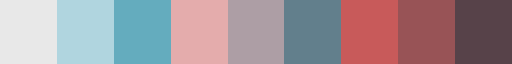

In [25]:
# All colors to create a complete legend
all_colors = ['#e8e8e8', '#b0d5df', '#64acbe', '#e4acac', '#ad9ea5', '#627f8c', '#c85a5a', '#985356', '#574249']
cmap = matplotlib.colors.ListedColormap(all_colors)
cmap

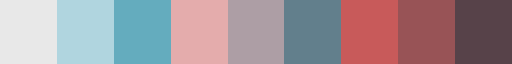

In [26]:
# Set of colors matching the elements of Bi_Class
# We have to exclude those that did not come up in the data
colors = ['#e8e8e8', # 1A
          '#b0d5df', # 1B
          '#64acbe', # 1C
          '#e4acac', # 2A
          '#ad9ea5', # 2B
          '#627f8c', # 2C
          '#c85a5a', # 3A
          '#985356', # 3B
          '#574249' # 3C 
]
            
cmap = matplotlib.colors.ListedColormap(colors)
cmap



In [27]:
merge = merge.sort_values(by=["animalCases","humanCases"],ascending=False)

In [28]:
both = merge.head(11)

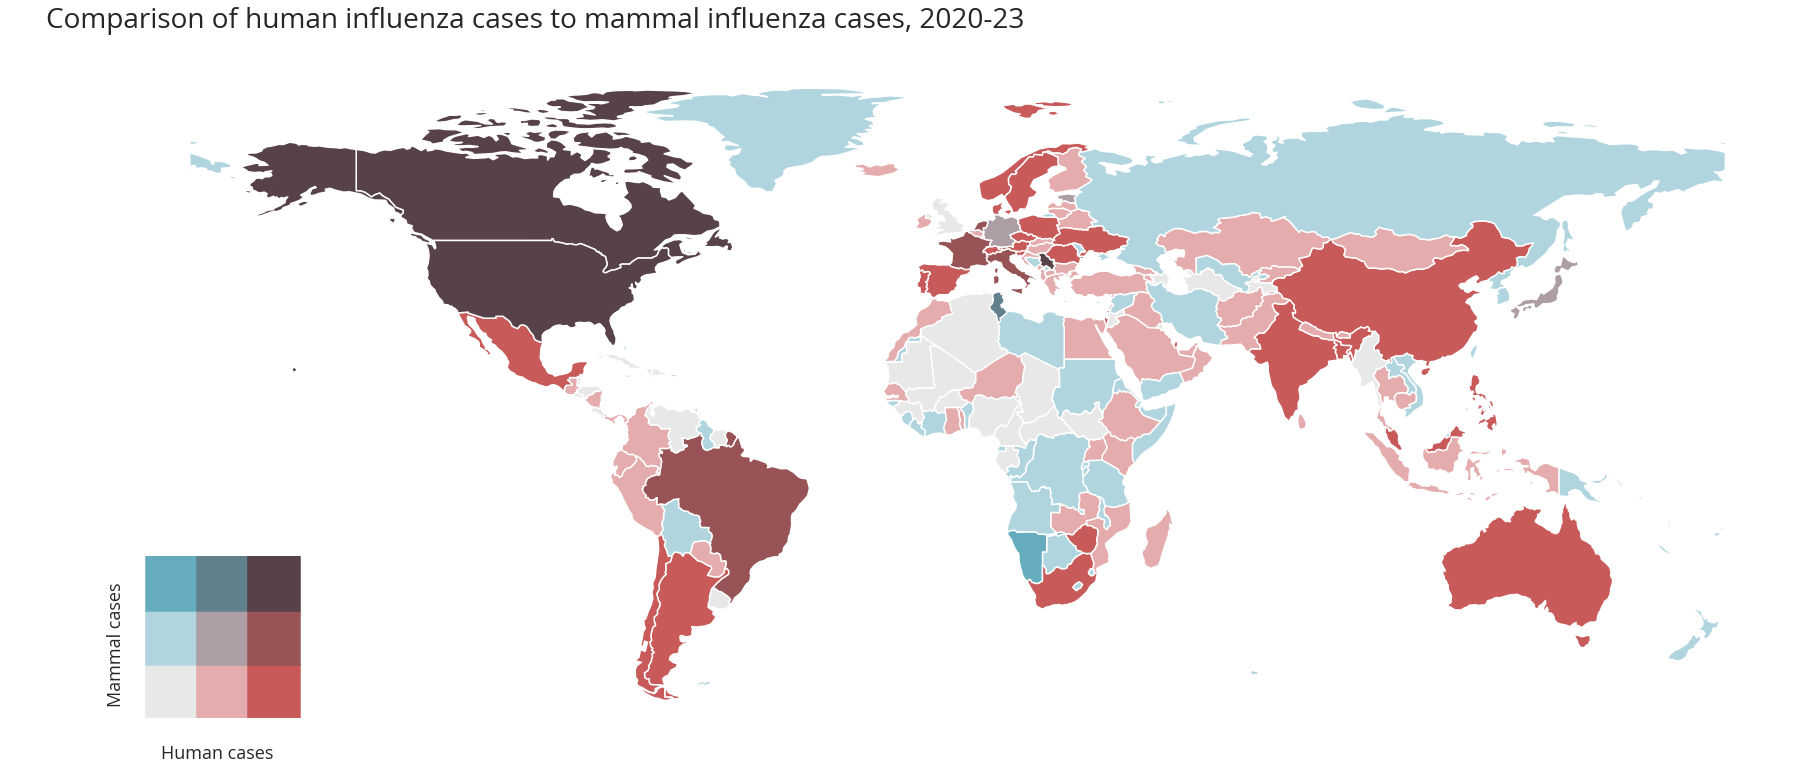

In [29]:
fig, ax = plt.subplots(figsize=(24,18))

# Adjust margins and set title
ax.margins(x=0.05) 


# Set the background color of the map
ax.set(facecolor='white')

# Turn axis off
ax.axis('off')
plt.tight_layout()

# Plot the map
df.plot(ax=ax,
           column='biClass',
           cmap=cmap, 
           categorical = True,
           legend = False)

plt.axis('off') # we don't need axis with coordinates
ttl = ax.set_title('Comparison of human influenza cases to mammal influenza cases, 2020-23',fontsize=28)
ttl.set_position([0.25,1.05])


# Step 2: draw the legend

# We're drawing a 3x3 "box" as 3 columns
# The xmin and xmax arguments axvspan are defined to create equally sized small boxes

img2 = fig # refer to the main figure
ax2 = fig.add_axes([-0.05, 0.25, 0.25, 0.125]) # add new axes to place the legend there
                                         # and specify its location 
alpha = 1 # alpha argument to make it more/less transperent

# Column 1
ax2.axvspan(xmin=0, xmax=0.33, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[0])
ax2.axvspan(xmin=0, xmax=0.33, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[1])
ax2.axvspan(xmin=0, xmax=0.33, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[2])

# Column 2
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[3])
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[4])
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[5])

# Column 3
ax2.axvspan(xmin=0.66, xmax=1, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[6])
ax2.axvspan(xmin=0.66, xmax=1, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[7])
ax2.axvspan(xmin=0.66, xmax=1, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[8])

# Step 3: annoate the legend
ax2.tick_params(axis='both', which='both', length=0) # remove ticks from the big box
ax2.axis('off'); # turn off its axis
ax2.text(s='Human cases', x=0.1, y=-0.25) # annotate x axis
ax2.text(s='Mammal cases', x=-0.25, y=0.1, rotation=90); # annotate y axis
# ax2.annotate("", xy=(0, 1), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for x 
# ax2.annotate("", xy=(1, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for y 
# plt.savefig('figures/human_mammal_flu_2020-23.png', dpi=1200,facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')
plt.show()


In [60]:
both_df = pd.merge(world,both,on='iso3',how='outer')
both_df = both_df[(both_df.countryname != "Antarctica")]

In [61]:
both_df = both_df.fillna(-70)

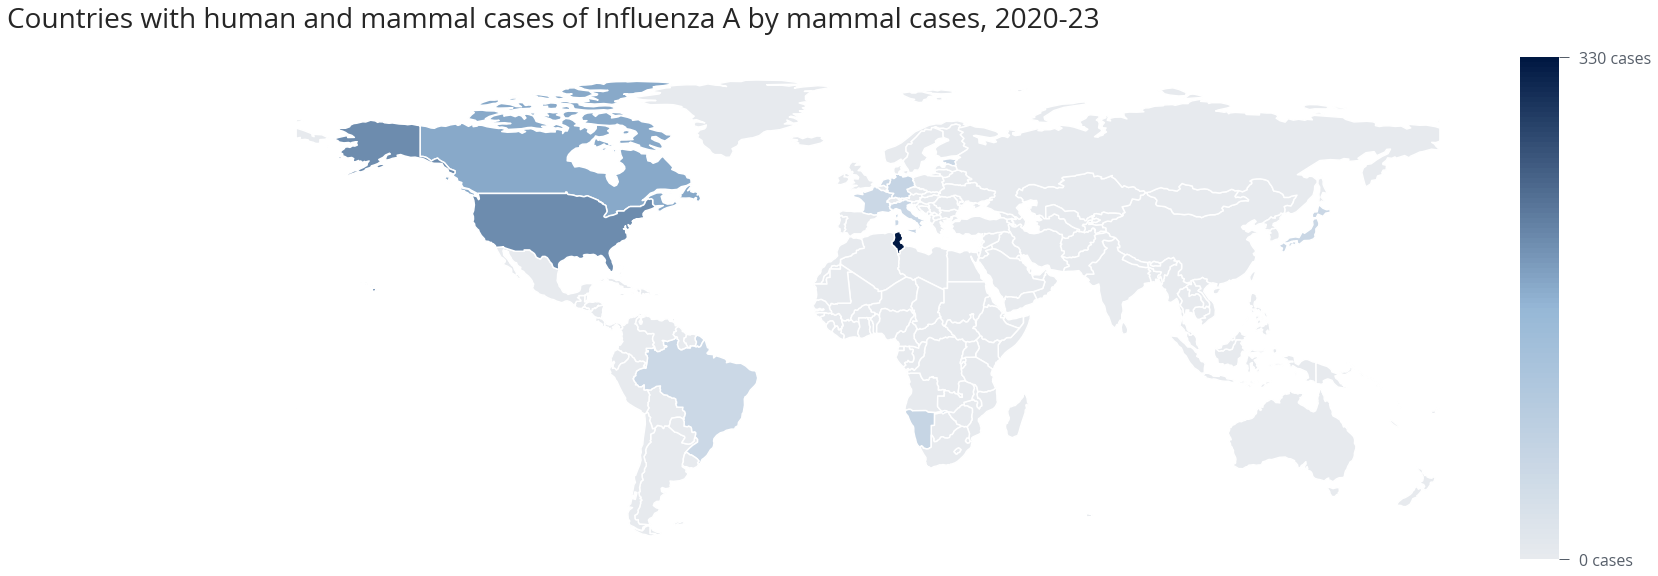

In [63]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(24, 18))

vmin=-70
vmax=330

# Plot the map
both_df.plot(column='animalCases',
           cmap=cm,
           legend=False,
           ax=ax, vmin=vmin,vmax=vmax)

# Adjust margins and set title
ax.margins(x=0.05) 

ttl = ax.set_title('Countries with human and mammal cases of Influenza A by mammal cases, 2020-23',fontsize=28)
ttl.set_position([0.25,1.05])


# Set the background color of the map
ax.set(facecolor='white')

# Turn axis off
ax.axis('off')

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cm,
                           norm=plt.Normalize(vmin=vmin,
                                              vmax=vmax))


sm._A = []
cbar = plt.colorbar(sm,cax=cax,drawedges=False)
cbar.set_ticks([vmin,vmax])
cbar.ax.yaxis.set_ticklabels(["0 cases","330 cases"])
cbar.ax.yaxis.set_tick_params(direction='out',length=10,width=1,pad=10,colors=chart[1],labelsize=16)
cbar.outline.set_visible(False)

# # # # # Display the map
# plt.tight_layout()
# plt.show()

# # # Save
plt.savefig('figures/human_mammal_influenza_A_by_mammal_2020-23.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

# Old

In [ ]:
flupath = "/Users/haileyrobertson/Documents/GitHub/uga-pipp/flunet/data/flunet_1995_2022.csv"
flunet = pd.read_csv(flupath)
flunet.head()

In [ ]:
poppath = "/Users/haileyrobertson/Documents/GitHub/uga-pipp/worldpop/data/WPP2022_Demographic_Indicators_Medium.csv"
pop = pd.read_csv(poppath)
pop = pop.loc[pop['LocTypeName'] == 'Country/Area']
pop = pop.drop(columns=['SortOrder','LocID','Notes','SDMX_code','LocTypeID','LocTypeName','ParentID','VarID','Variant'])
pop.head()

In [ ]:
pop22 = pop.loc[pop['Time']==2022]
pop22 = pop22.dropna()

In [ ]:
columns = ["Location","TPopulation1Jan","MedianAgePop"]
popTemp = pop22[columns]

In [ ]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(popTemp.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(popTemp.iloc[:,1:])
popTemp["label"] = clusters

In [ ]:
popTemp = popTemp.sort_values(by="TPopulation1Jan")

In [ ]:
popTemp = popTemp.iloc[:-1,:]

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x='MedianAgePop', y='TPopulation1Jan', data=popTemp, hue='label', ax=ax)
ax.set(title='Clustering')